In [152]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
df = joblib.load("../../../kospi200_preprocessed.pkl")
df.head()


date time    open    high     low   close  prevClose  \
2010-02-16 09:01:00  20100216  901  207.55  207.65  207.50  207.60      207.5   
2010-02-16 09:02:00  20100216  902  207.60  207.65  207.25  207.55      207.5   
2010-02-16 09:03:00  20100216  903  207.55  207.80  207.50  207.60      207.5   
2010-02-16 09:04:00  20100216  904  207.55  207.85  207.55  207.80      207.5   
2010-02-16 09:05:00  20100216  905  207.80  208.15  207.80  208.05      207.5   

                        vol  
2010-02-16 09:01:00  3985.0  
2010-02-16 09:02:00  5095.0  
2010-02-16 09:03:00  2175.0  
2010-02-16 09:04:00  1301.0  
2010-02-16 09:05:00  3870.0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941826 entries, 2010-02-16 09:01:00 to 2020-04-03 15:45:00
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       940997 non-null  object 
 1   time       940997 non-null  object 
 2   open       940997 non-null  float64
 3   high       940997 non-null  float64
 4   low        940997 non-null  float64
 5   close      940997 non-null  float64
 6   prevClose  940997 non-null  float64
 7   vol        940997 non-null  float64
dtypes: float64(6), object(2)
memory usage: 64.7+ MB


In [30]:
df.describe()

open           high            low          close  \
count  940997.000000  940997.000000  940997.000000  940997.000000   
mean      264.987276     265.053434     264.920993     264.987191   
std        26.158111      26.153471      26.162358      26.157964   
min       194.750000     195.600000     194.700000     194.750000   
25%       248.150000     248.200000     248.100000     248.150000   
50%       260.900000     261.000000     260.850000     260.900000   
75%       277.400000     277.500000     277.350000     277.400000   
max       340.250000     340.300000     340.150000     340.250000   

           prevClose            vol  
count  940997.000000  940997.000000  
mean      264.969756     542.931899  
std        26.157177     641.807158  
min       197.500000       1.000000  
25%       248.300000     156.000000  
50%       260.850000     344.000000  
75%       277.550000     691.000000  
max       339.900000   22348.000000

In [42]:
df[df.isna().any(axis=1)]


date time  open  high  low  close  prevClose  vol
2010-07-16 09:01:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
2010-07-16 09:02:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
2010-07-16 09:03:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
2010-07-16 09:04:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
2010-07-16 09:05:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
...                  ...  ...   ...   ...  ...    ...        ...  ...
2020-03-19 12:31:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
2020-03-19 12:32:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
2020-03-19 12:33:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
2020-03-19 12:34:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN
2020-03-19 12:35:00  NaN  NaN   NaN   NaN  NaN    NaN        NaN  NaN

[829 rows x 8 columns]

# Volume

In [49]:
# Í∏∞Î≥∏Ï†ÅÏù∏ ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
print("Í∏∞Ïà† ÌÜµÍ≥ÑÎüâ:")
print(df['vol'].describe())


Í∏∞Ïà† ÌÜµÍ≥ÑÎüâ:
count    940997.000000
mean        542.931899
std         641.807158
min           1.000000
25%         156.000000
50%         344.000000
75%         691.000000
max       22348.000000
Name: vol, dtype: float64


## ÌûàÏä§ÌÜ†Í∑∏Îû®Í≥º Î∞ïÏä§ÌîåÎ°ØÏùÑ ÌÜµÌï¥ Î∂ÑÌè¨ ÌôïÏù∏

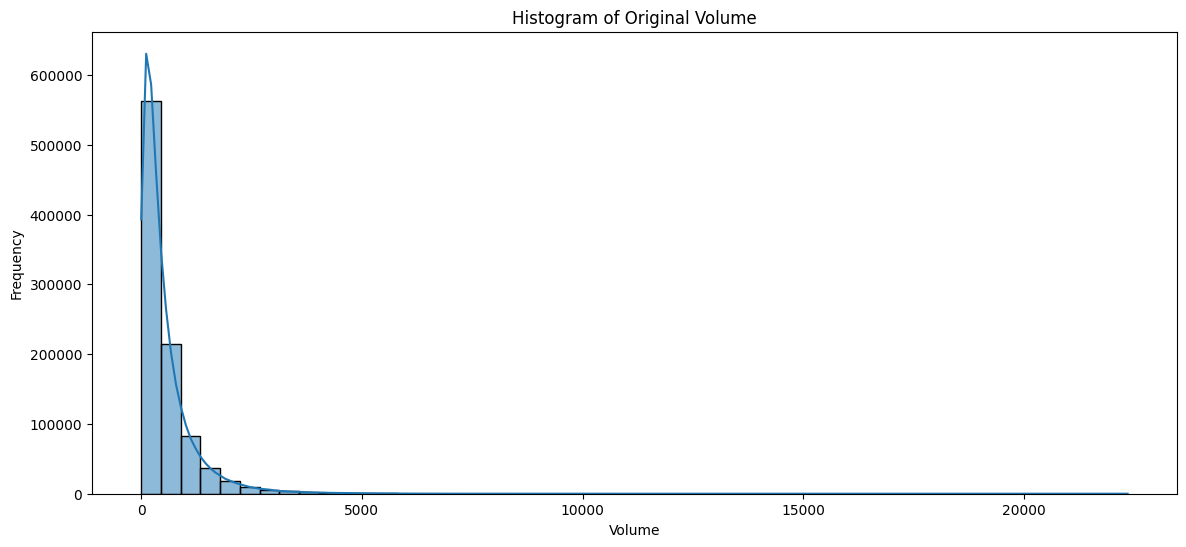

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(df['vol'], bins=50, kde=True)
plt.title('Histogram of Original Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.show()


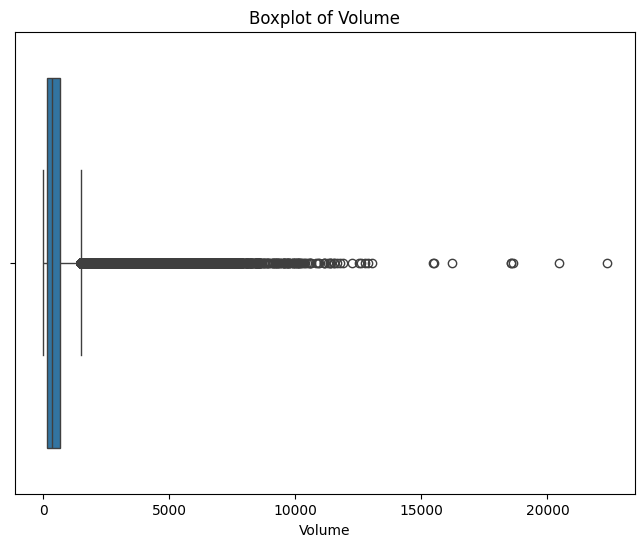

Ïù¥ÏÉÅÏπò Í∞úÏàò: 65248


In [64]:
# Í±∞ÎûòÎüâÏùò Ïù¥ÏÉÅÏπò ÌÉêÏßÄ (Î∞ïÏä§ÌîåÎ°Ø, IQR ÌôúÏö©)

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['vol'])
plt.title('Boxplot of Volume')
plt.xlabel('Volume')
plt.show()

# IQRÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
Q1 = df['vol'].quantile(0.25)
Q3 = df['vol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['vol'] < lower_bound) | (df['vol'] > upper_bound)]
print(f"Ïù¥ÏÉÅÏπò Í∞úÏàò: {outliers.shape[0]}")


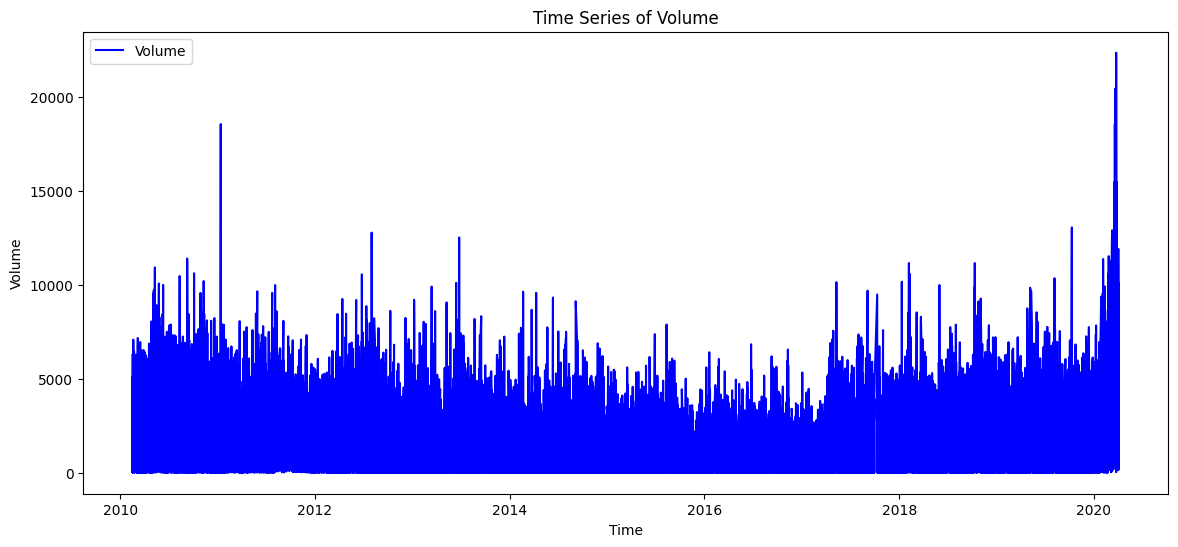

In [ ]:
# ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î°ú ÏãúÍ∞ÑÏóê Îî∞Î•∏ Ìå®ÌÑ¥ Î∂ÑÏÑù (Í∏∞Î≥∏Ï†ÅÏù∏ ÏãúÍ≥ÑÏó¥ Í∑∏ÎûòÌîÑ)
plt.figure(figsize=(14, 6))
plt.plot(df['vol'], label='Volume', color='blue')
plt.title('Time Series of Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()


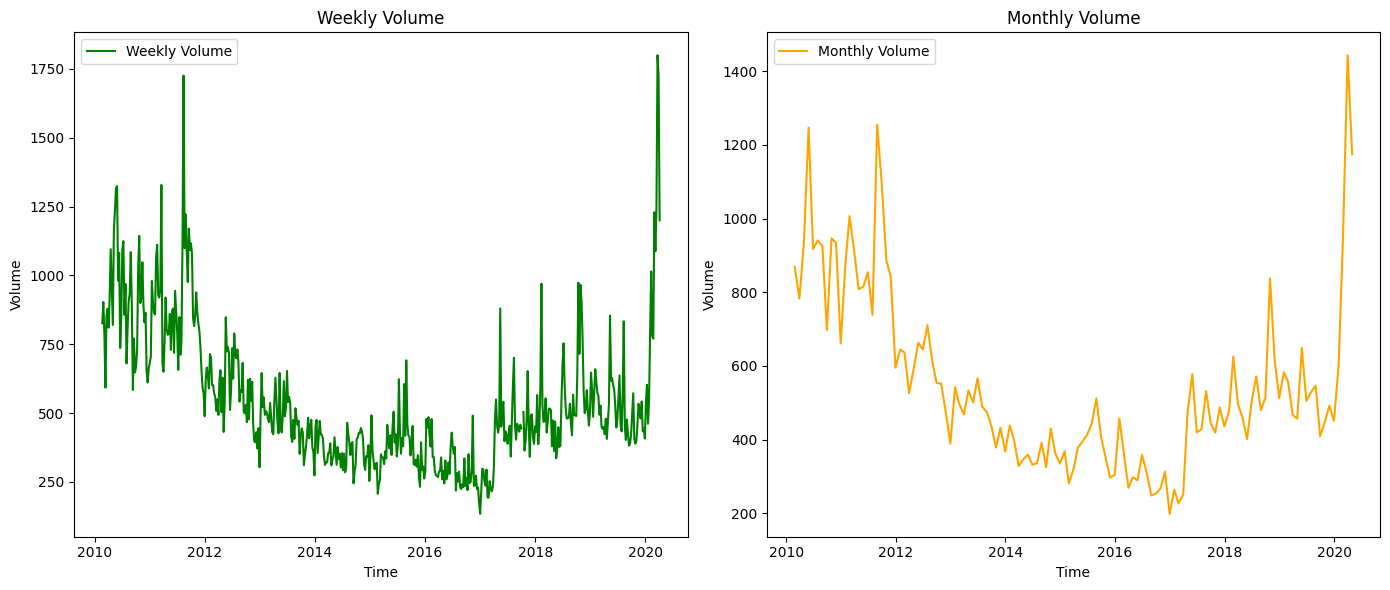

In [ ]:
# ÏùºÍ∞Ñ, Ï£ºÍ∞Ñ, ÏõîÍ∞Ñ Î≥ÄÎèô ÎπÑÍµê (Resampling ÌôúÏö©)

df_daily = df.resample('D')['vol'].mean()  # ÏùºÍ∞Ñ Îç∞Ïù¥ÌÑ∞
df_weekly = df.resample('W')['vol'].mean()  # Ï£ºÍ∞Ñ Îç∞Ïù¥ÌÑ∞
df_monthly = df.resample('ME')['vol'].mean()  # ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞

# Ï£ºÍ∞Ñ, ÏõîÍ∞Ñ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(df_weekly, label='Weekly Volume', color='green')
plt.title('Weekly Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_monthly, label='Monthly Volume', color='orange')
plt.title('Monthly Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

## Í±∞ÎûòÎüâÍ≥º Í∞ÄÍ≤© Î≥ÄÌôîÏú®Ïùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù
- Í±∞ÎûòÎüâÏù¥ Í∞ÄÍ≤© Î≥ÄÎèôÏùÑ Ïú†Î∞úÌïòÎäîÏßÄ ÌôïÏù∏

C:\Users\smlee\AppData\Local\Temp\ipykernel_8736\456739502.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['close_change'] = df['close'].pct_change()  # Í∞ÄÍ≤© Î≥ÄÎèôÎ•†


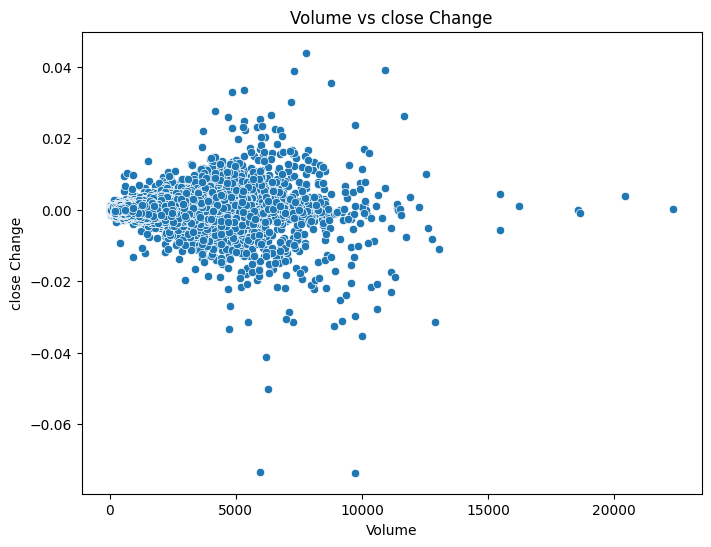

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
                   vol  close_change
vol           1.000000     -0.004494
close_change -0.004494      1.000000


In [ ]:
# Í±∞ÎûòÎüâÍ≥º Í∞ÄÍ≤© Î≥ÄÌôîÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù 
df['close_change'] = df['close'].pct_change()  # Í∞ÄÍ≤© Î≥ÄÎèôÎ•†
# Ïù¥Ï†Ñ Í∞íÍ≥º ÎπÑÍµêÌïòÏó¨ Î≥ÄÌôîÏú® Í≥ÑÏÇ∞ÏÇ∞

# Í±∞ÎûòÎüâÍ≥º Í∞ÄÍ≤© Î≥ÄÎèôÎ•†Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['vol'], y=df['close_change'])
plt.title('Volume vs close Change')
plt.xlabel('Volume')
plt.ylabel('close Change')
plt.show()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
correlation = df[['vol', 'close_change']].corr()
print("ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
print(correlation)

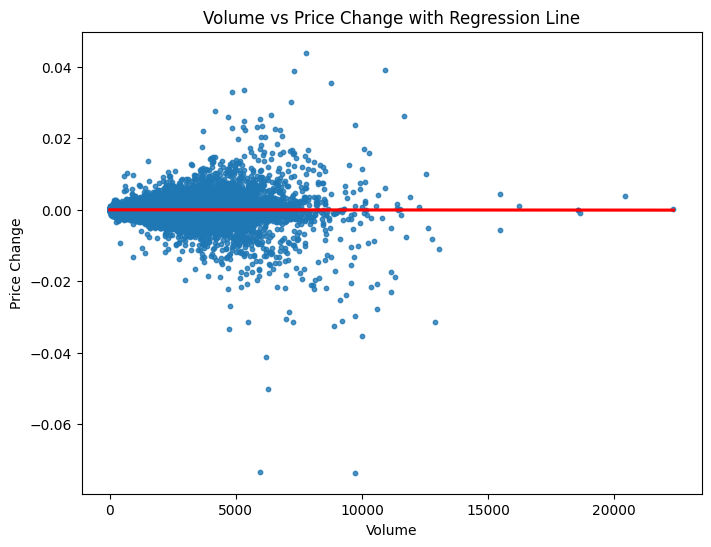

In [ ]:
# Í±∞ÎûòÎüâÍ≥º Í∞ÄÍ≤© Î≥ÄÌôîÏùò Í¥ÄÍ≥ÑÎ•º Îçî Íµ¨Ï≤¥Ï†ÅÏúºÎ°ú Î≥¥Í∏∞ ÏúÑÌï¥ ÌöåÍ∑ÄÏÑ† Ï∂îÍ∞Ä
plt.figure(figsize=(8, 6))
sns.regplot(x=df['vol'], y=df['close_change'], scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Volume vs Price Change with Regression Line')
plt.xlabel('Volume')
plt.ylabel('Price Change')
plt.show()


## Í∞ÄÍ≤©Ïùò Î≥ÄÎèôÏÑ±

C:\Users\smlee\AppData\Local\Temp\ipykernel_8736\164898890.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['volatility'] = df['vol'].pct_change().rolling(window=80).std()  # 5Ïùº Ïù¥Îèô ÌëúÏ§ÄÌé∏Ï∞®


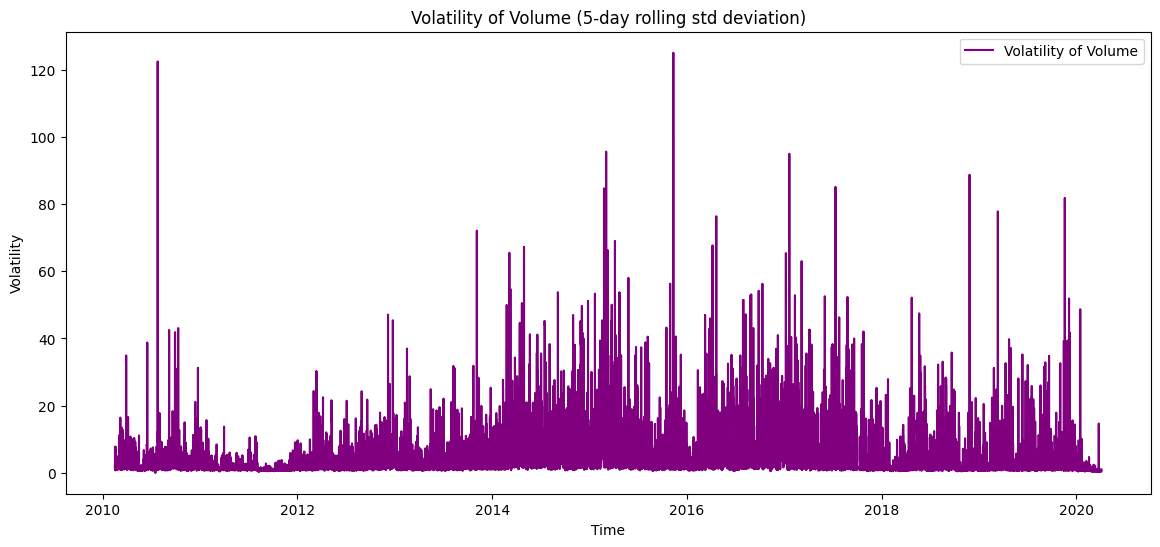

In [ ]:
# Í±∞ÎûòÎüâÏùò Î≥ÄÎèôÏÑ± (Volatility) Î∂ÑÏÑù
df['volatility'] = df['vol'].pct_change().rolling(window=80).std()  # 80Î∂Ñ Ïù¥Îèô ÌëúÏ§ÄÌé∏Ï∞®

plt.figure(figsize=(14, 6))
plt.plot(df['volatility'], label='Volatility of Volume', color='purple')
plt.title('Volatility of Volume (5-day rolling std deviation)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()


1. üìà Í∏âÍ≤©Ìïú Î≥ÄÎèôÏÑ± Ï¶ùÍ∞Ä ‚Üí Í±∞ÎûòÎüâ Ìè≠Ï¶ù
- ÌäπÏ†ï Íµ¨Í∞ÑÏóêÏÑú Î≥ÄÎèôÏÑ±Ïù¥ Í∏âÍ≤©Ìûà Ï¶ùÍ∞ÄÌñàÎã§Î©¥ ÌÅ∞ Í±∞Îûò(Í∏âÎì±/Í∏âÎùΩ)Í∞Ä Î∞úÏÉùÌñàÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§
- Îâ¥Ïä§, Í≤ΩÏ†ú Ïù¥Î≤§Ìä∏, Îß§ÌÅ¨Î°ú Ìä∏Î†åÎìú Îì±Ïùò ÏòÅÌñ•ÏùÑ Î∞õÏùÑ ÏàòÎèÑ ÏûàÏùå
- Ïù¥Îü¥ Í≤ΩÏö∞ Ìï¥Îãπ ÎÇ†Ïßú/ÏãúÍ∞ÑÏùÑ ÌôïÏù∏Ìï¥ Î≥¥Î©¥ ÏõêÏù∏ÏùÑ Ï∞æÏùÑ Ïàò ÏûàÎã§
2. üìâ Î≥ÄÎèôÏÑ±Ïù¥ ÎÇÆÏùÄ Íµ¨Í∞Ñ ‚Üí ÏïàÏ†ïÏ†ÅÏù∏ Í±∞Îûò
- Î≥ÄÎèôÏÑ±Ïù¥ ÎÇÆÏúºÎ©¥ Í±∞ÎûòÎüâ Î≥ÄÌôîÍ∞Ä ÌÅ¨ÏßÄ ÏïäÍ≥†, ÏãúÏû•Ïù¥ Ï°∞Ïö©ÌïòÎã§Îäî Îúª
- ÏùºÏ†ïÌïú Ìå®ÌÑ¥ÏùÑ Ïú†ÏßÄÌïòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÏùå
3.  Î∞òÎ≥µÏ†ÅÏù∏ Î≥ÄÎèô Ìå®ÌÑ¥Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
- ÏòàÎ•º Îì§Ïñ¥ ÌäπÏ†ï ÏãúÍ∞ÑÎåÄ(Ïû• ÏãúÏûë, Ïû• ÎßàÍ∞ê)ÎßàÎã§ Î≥ÄÎèôÏÑ±Ïù¥ ÎÜíÏïÑÏßÄÎäîÏßÄ ÌôïÏù∏ Í∞ÄÎä•
- Ï£ºÍ∞Ñ/ÏõîÍ∞Ñ Îã®ÏúÑÎ°ú Î≥ÄÎèôÏÑ±Ïù¥ Ï¶ùÍ∞ÄÌïòÎäî Ìå®ÌÑ¥Ïù¥ ÏûàÎã§Î©¥, ÌäπÏ†ï ÏöîÏùº/ÏãúÍ∞ÑÏóê Í±∞ÎûòÎüâÏù¥ Î™∞Î¶¨ÎäîÏßÄ Î∂ÑÏÑù Í∞ÄÎä•

<Axes: xlabel='hour'>

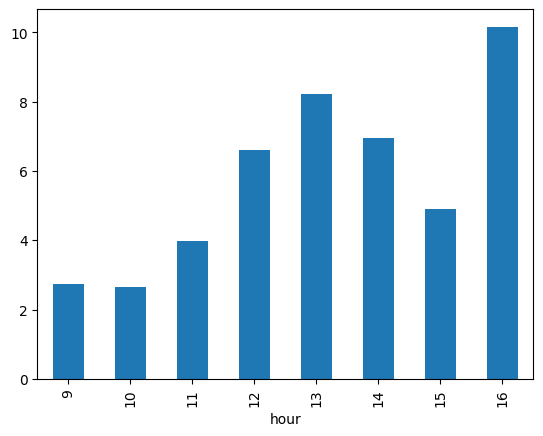

In [ ]:
# ÌäπÏ†ï ÏöîÏùº/ÏãúÍ∞ÑÏóê Î≥ÄÎèôÏÑ±Ïù¥ ÎÜíÏùÄÏßÄ ÌôïÏù∏
df['hour'] = df.index.hour
df.groupby('hour')['volatility'].mean().plot(kind='bar')

In [ ]:
# Î≥ÄÎèôÏÑ±Ïù¥ Í∞ÄÍ≤© Î≥ÄÌôî(close_change)ÏôÄ Ïó∞Í¥Ä ÏûàÎäîÏßÄ ÌôïÏù∏
df[['close_change', 'volatility']].corr()


close_change  volatility
close_change      1.000000    0.000232
volatility        0.000232    1.000000

## Í±∞ÎûòÎüâ Ïù¥ÎèôÌèâÍ∑†(Volume Moving Average) Î∂ÑÏÑù
- Îã®Í∏∞ vs. Ïû•Í∏∞ Ïù¥ÎèôÌèâÍ∑† ‚Üí Í±∞ÎûòÎüâ Ï∂îÏÑ∏ ÌååÏïÖ

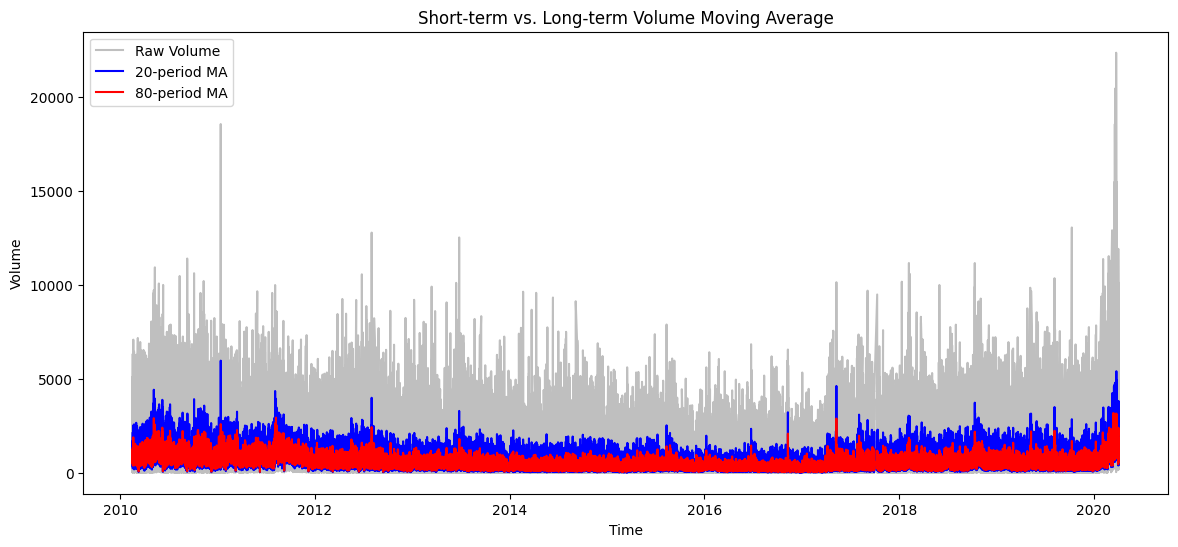

In [71]:
df['vol_ma_20'] = df['vol'].rolling(window=20).mean()  # 5Í∞ú Îã®ÏúÑ Ïù¥ÎèôÌèâÍ∑†
df['vol_ma_80'] = df['vol'].rolling(window=80).mean()  # 20Í∞ú Îã®ÏúÑ Ïù¥ÎèôÌèâÍ∑†

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['vol'], alpha=0.5, label='Raw Volume', color='gray')
plt.plot(df.index, df['vol_ma_20'], label='20-period MA', color='blue')
plt.plot(df.index, df['vol_ma_80'], label='80-period MA', color='red')
plt.title('Short-term vs. Long-term Volume Moving Average')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()


## Í±∞ÎûòÎüâÏùò ÏöîÏùº/ÏãúÍ∞Ñ Ìå®ÌÑ¥ Î∂ÑÏÑù
- ÌäπÏ†ï ÏãúÍ∞ÑÎåÄÏóê Í±∞ÎûòÎüâÏù¥ Î™∞Î¶¨ÎäîÏßÄ ÌååÏïÖ

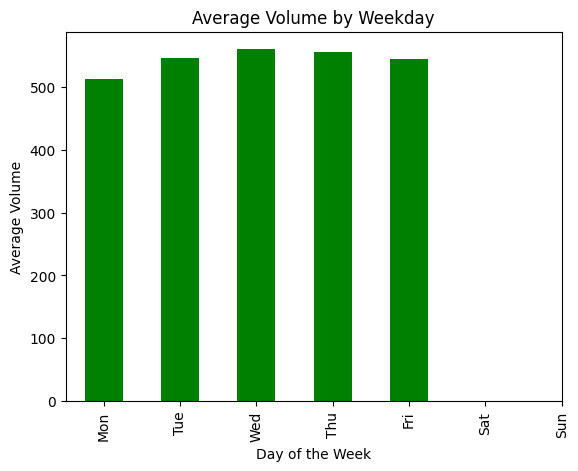

In [75]:
# ÏöîÏùºÎ≥Ñ Í±∞ÎûòÎüâ ÌèâÍ∑†

df['weekday'] = df.index.dayofweek  # 0=ÏõîÏöîÏùº, 6=ÏùºÏöîÏùº
df.groupby('weekday')['vol'].mean().plot(kind='bar', color='green')
plt.title('Average Volume by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Volume')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


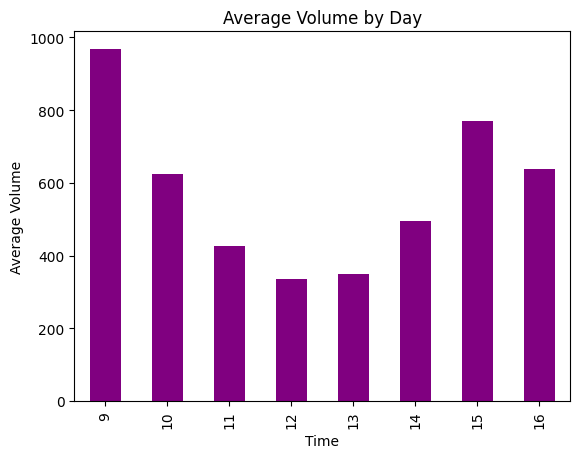

In [79]:
# ÏãúÍ∞ÑÎåÄÎ≥Ñ Í±∞ÎûòÎüâ ÌèâÍ∑†

df.groupby('hour')['vol'].mean().plot(kind='bar', color='purple')
plt.title('Average Volume by Day')
plt.xlabel('Time')
plt.ylabel('Average Volume')
plt.show()


## Í±∞ÎûòÎüâÍ≥º Î≥ÄÎèôÏÑ±(Volatility)Ïùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù
- Î≥ÄÎèôÏÑ±Ïù¥ Ïª§Ïßà Îïå Í±∞ÎûòÎüâÎèÑ Í∞ôÏù¥ Ï¶ùÍ∞ÄÌïòÎäîÏßÄ ÌôïÏù∏

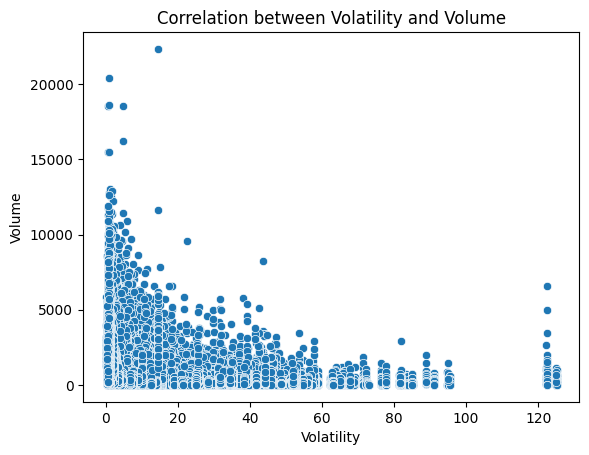

volatility       vol
volatility    1.000000 -0.200004
vol          -0.200004  1.000000

In [80]:
sns.scatterplot(x=df['volatility'], y=df['vol'])
plt.title('Correlation between Volatility and Volume')
plt.xlabel('Volatility')
plt.ylabel('Volume')
plt.show()

df[['volatility', 'vol']].corr()  # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞


# Volume Ï†ÑÏ≤òÎ¶¨

In [92]:
df = joblib.load("../../../kospi200_preprocessed.pkl")

## 1. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨: Î°úÍ∑∏ Î≥ÄÌôò

In [93]:
df['vol_log'] = np.log1p(df['vol'])  # log(1 + x) Î≥ÄÌôò


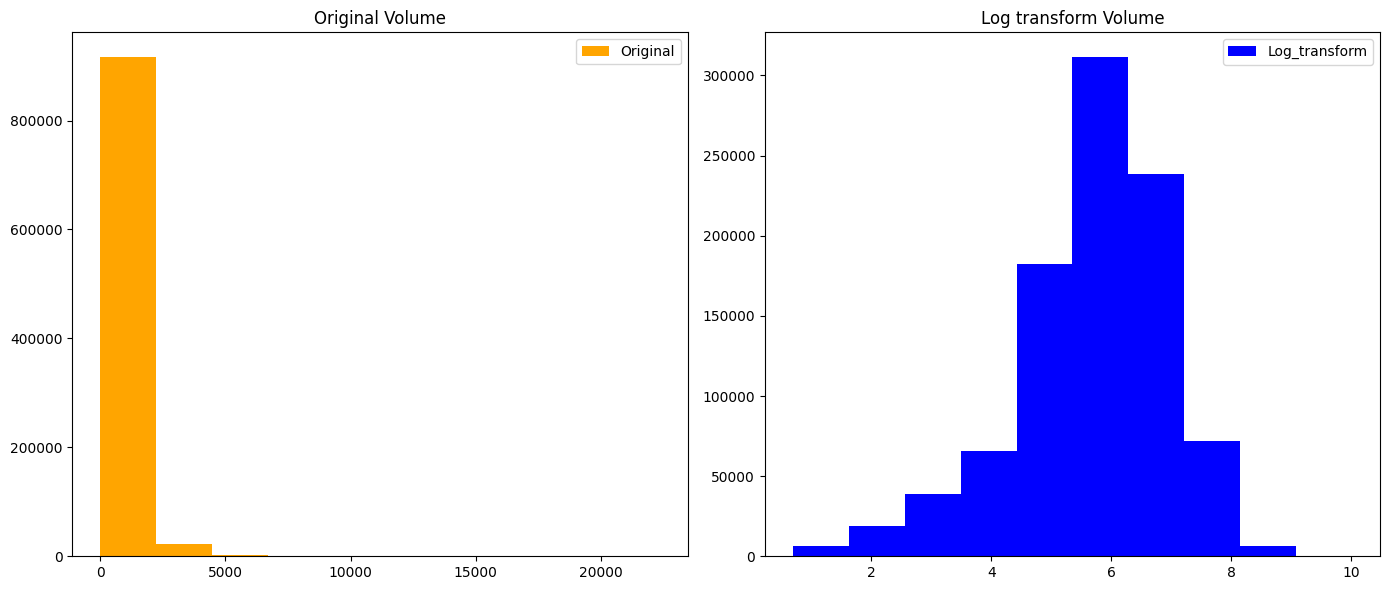

In [94]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(df['vol'], label='Original', color='orange')
plt.title('Original Volume')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['vol_log'], label='Log_transform', color='blue')
plt.title('Log transform Volume')
plt.legend()

plt.tight_layout()
plt.show()


## 2. Ïä§Î¨¥Îî© & Ïù¥Îèô ÌèâÍ∑†
- Î≥ÄÎèôÏÑ±ÏùÑ ÏôÑÌôîÌïòÍ≥† Ìå®ÌÑ¥ÏùÑ Î∂ÄÎìúÎüΩÍ≤å ÎßåÎì§Í∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©

### (1) Îã®Ïàú Ïù¥Îèô ÌèâÍ∑†

In [95]:
df['vol_sma_5'] = df['vol'].rolling(window=5).mean()  # 5Î∂Ñ Ïù¥ÎèôÌèâÍ∑†
df['vol_sma_20'] = df['vol'].rolling(window=20).mean()  # 20Î∂Ñ Ïù¥ÎèôÌèâÍ∑†
df['vol_sma_80'] = df['vol'].rolling(window=80).mean()  # 80Î∂Ñ Ïù¥ÎèôÌèâÍ∑†

### (2) ÏßÄÏàò Ïù¥ÎèôÌèâÍ∑†
- ÏµúÍ∑º Í±∞ÎûòÎüâ Î≥ÄÎèôÏùÑ Îçî Îπ†Î•¥Í≤å Î∞òÏòÅÌïòÍ≥† Ïã∂ÏùÑ Îïå ÏÇ¨Ïö©

In [96]:
df['vol_ema'] = df['vol'].ewm(span=80, adjust=False).mean()  # 80Îã®ÏúÑ EMA


## 3. Ïä§ÏºÄÏùºÎßÅ

### (1) Min-Max Scaling
- Î™®Îç∏Ïù¥ Í±∞Î¶¨ Í∏∞Î∞ò ÏïåÍ≥†Î¶¨Ï¶ò(Ïòà: KNN, SVM)ÏùÑ ÏÇ¨Ïö©Ìï† Îïå
- Í±∞ÎûòÎüâ Í∞íÏùò Î≤îÏúÑÎ•º Ï†úÌïúÌïòÍ≥† Ïã∂ÏùÑ Îïå

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['vol_scaled'] = scaler.fit_transform(df[['vol']])


### (2) Standard Scaling
- Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Îî∞Î•¥Í≤å ÌïòÍ≥† Ïã∂ÏùÑ Îïå

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['vol_standardized'] = scaler.fit_transform(df[['vol']])


## 4. ÏãúÍ∞ÑÎ≥Ñ/ÏöîÏùºÎ≥Ñ Ìå®ÌÑ¥ Î∞òÏòÅÌïú ÌäπÏßï ÏÉùÏÑ±

### (1) ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í±∞ÎûòÎüâ Ï∂îÍ∞Ä

In [99]:
df['hour'] = df.index.hour  # ÏãúÍ∞ÑÎåÄ Ï∂îÏ∂ú
df['vol_hour_avg'] = df.groupby('hour')['vol'].transform('mean')  # ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í±∞ÎûòÎüâ


### (2) ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Í±∞ÎûòÎüâ Ï∂îÍ∞Ä

In [100]:
df['weekday'] = df.index.dayofweek  # ÏöîÏùº (0=ÏõîÏöîÏùº, 6=ÏùºÏöîÏùº)
df['vol_weekday_avg'] = df.groupby('weekday')['vol'].transform('mean')  # ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Í±∞ÎûòÎüâ


## 5. Í±∞ÎûòÎüâ Î≥ÄÌôîÏú® Í≥ÑÏÇ∞

In [101]:
df['vol_change'] = df['vol'].pct_change()


C:\Users\smlee\AppData\Local\Temp\ipykernel_8736\3582059234.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['vol_change'] = df['vol'].pct_change()


In [103]:
df.columns

Index(['date', 'time', 'open', 'high', 'low', 'close', 'prevClose', 'vol',
       'vol_log', 'vol_sma_5', 'vol_sma_20', 'vol_sma_80', 'vol_ema',
       'vol_scaled', 'vol_standardized', 'hour', 'vol_hour_avg', 'weekday',
       'vol_weekday_avg', 'vol_change'],
      dtype='object')

# Î∏îÎ°úÍ∑∏ Î≥¥Í≥† Îî∞ÎùºÌïòÍ∏∞

In [123]:
data = joblib.load("../../../kospi200_preprocessed.pkl")

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941826 entries, 2010-02-16 09:01:00 to 2020-04-03 15:45:00
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       940997 non-null  object 
 1   time       940997 non-null  object 
 2   open       940997 non-null  float64
 3   high       940997 non-null  float64
 4   low        940997 non-null  float64
 5   close      940997 non-null  float64
 6   prevClose  940997 non-null  float64
 7   vol        940997 non-null  float64
dtypes: float64(6), object(2)
memory usage: 64.7+ MB


Îç∞Ïù¥ÌÑ∞Ïùò date, time Î®ºÏ†Ä Ï±ÑÏö∞Í∏∞

In [127]:
data['date'] = data.index.strftime('%Y%m%d') 
data['time'] = data.index.strftime('%H%M').astype(int).astype(str)


## 1. Í≤∞Ï∏°Ïπò

In [ ]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
data.isna().sum()

date           0
time           0
open         829
high         829
low          829
close        829
prevClose    829
vol          829
dtype: int64

In [ ]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨Îüº Î™©Î°ù ÏÉùÏÑ±
a = data.isnull().sum(0)
nullCol = [x for x in a.index if a[x] != 0]

# Î≥¥Í∞ÑÎ≤ï Ï†ÅÏö©
if len(nullCol) > 0:
    for c in nullCol:
        print('{} has Null'.format(c))
        data[c] = data[c].interpolate(method='time') # method='linear' , 'spline' ÎèÑ Í∞ÄÎä•


open has Null
high has Null
low has Null
close has Null
prevClose has Null
vol has Null


## 2. Ï¢ÖÍ∞Ä
- StandardizationÍ≥º Normalization Ï§ë Ïñ¥Îñ§ Î∞©Î≤ïÏùÑ Ï†ÅÏö©ÌïòÎäîÍ≤å Í∞ÄÏû• RobustÌïú Î™®Îç∏ÏùÑ ÎßåÎì§ Ïàò ÏûàÏùÑÏßÄ
- Starndardization
    - ÎßéÏùÄ ÎÖºÎ¨∏ÏóêÏÑú ÏÇ¨Ïö©(Í≤∞Í≥º Ï¢ãÏùå)
    - OutlierÏóê ÎåÄÌï¥ÏÑúÎèÑ min-max NormalizationÍ≥º ÎπÑÍµêÌñàÏùÑ Îïå Îçî ÏïàÏ†ïÏ†Å
    - ** Í∑∏Îü¨ÎÇò ÌèâÍ∑† Î≥ÄÌôîÏóê ÎåÄÌïú ÎØºÍ∞êÎèÑ"Í∞Ä "ÏµúÍ≥† - ÏµúÏ†ÄÍ∞ÄÏùò Î≥ÄÌôîÏóê ÎåÄÌïú ÎØºÍ∞êÎèÑ" Î≥¥Îã§ ÎçîÏö± ÌÅ¨Îã§ **
        - ÌèâÍ∑†Ïù¥ Î≥ÄÌôîÌïòÎäî Í≤ÉÏù¥ ÏµúÍ≥†Í∞íÍ≥º ÏµúÏ†ÄÍ∞íÏùò Ï∞®Ïù¥Í∞Ä Î≥ÄÌïòÎäî Í≤ÉÎ≥¥Îã§ Îçî ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§
        - Îç∞Ïù¥ÌÑ∞ A: [100, 110, 120]
        - Îç∞Ïù¥ÌÑ∞ B: [1000, 10000, 100000]
        - Îëê Îç∞Ïù¥ÌÑ∞ Î™®Îëê ÌëúÏ§ÄÌôîÌïòÎ©¥ ÌèâÍ∑†ÏùÄ 0, ÌëúÏ§ÄÌé∏Ï∞®Îäî 1Î°ú ÎßûÏ∂∞ÏßëÎãàÎã§. ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞ BÎäî **Î≤îÏúÑ(range)**Í∞Ä Ìõ®Ïî¨ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê ÏµúÍ≥†-ÏµúÏ†ÄÏùò Ï∞®Ïù¥Í∞Ä Ìõ®Ïî¨ Îçî ÌÅ¨Îã§. ÌïòÏßÄÎßå ÌëúÏ§ÄÌôî ÌõÑÏóêÎäî ÌèâÍ∑†Ïùò Î≥ÄÌôîÍ∞Ä Îçî Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ ÌïòÍ≤å ÎêúÎã§.
    
- ÌëúÏ§ÄÌôîÎäî Ï¢ÖÍ∞ÄÏóê ÎåÄÌïú ÌèâÍ∑†Ïù¥ Í≥ÑÏÜç Î∞îÎÄú. -> Ïù¥Ïóê ÎåÄÌïú Î≥ÄÎèôÏÑ±ÏùÑ Ï§ÑÏù¥Í≥†Ïûê Min-Max NormalizationÏùÑ ÏÑ†ÌÉù
    - Min-Max NormalizationÏùò Í∞ÄÏû• ÌÅ∞ Î¨∏Ï†ú: Î≤îÏúÑÎ•º Ï¥àÍ≥ºÌïòÎäî Í∞ÄÍ≤©Ïù¥ ÏûàÏùÑ Ïãú Ïä§ÏºÄÏùºÎßÅÏù¥ Ïù¥ÏÉÅÌïòÍ≤å Îê®. -> Ï†ÅÏ†ïÌïú Î≤îÏúÑÎ•º Ïû°ÏïÑÏïº ÌïúÎã§.

count    941826.000000
mean        264.970306
std          26.163221
min         194.750000
25%         248.150000
50%         260.900000
75%         277.400000
max         340.250000
Name: close, dtype: float64


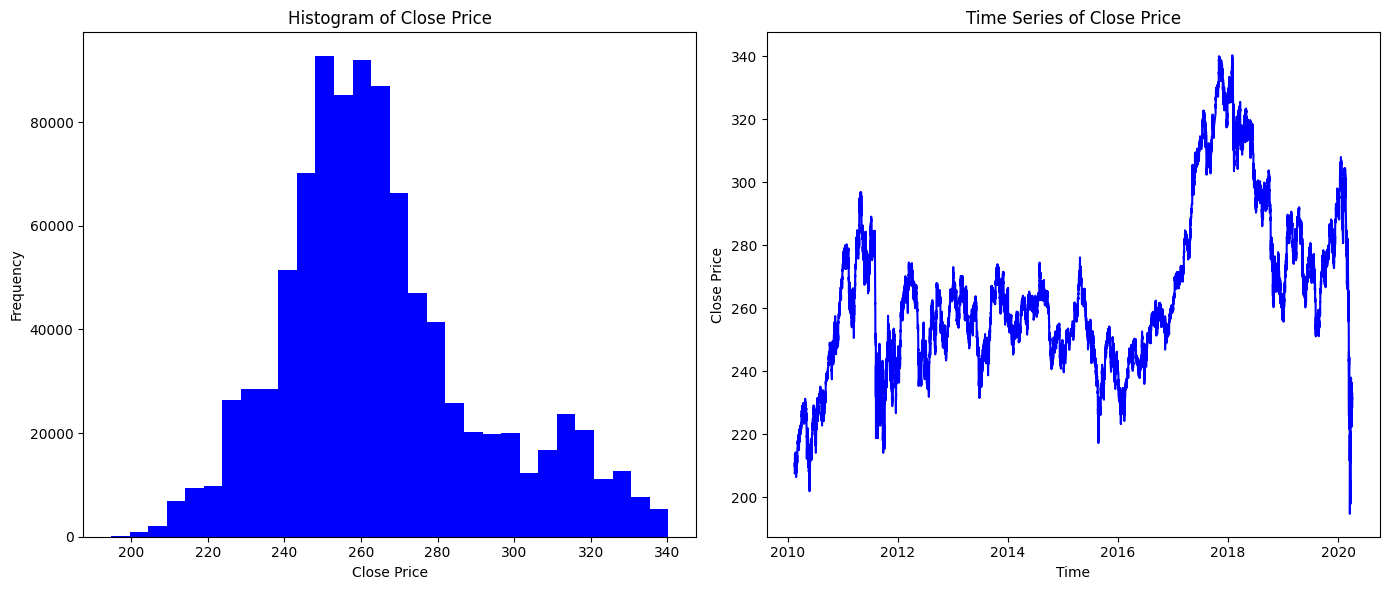

In [135]:
print(data['close'].describe())

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axs[0].hist(data['close'], bins=30, color='blue')
axs[0].set_title('Histogram of Close Price')
axs[0].set_xlabel('Close Price')
axs[0].set_ylabel('Frequency')

# Time series plot
axs[1].plot(data['close'], color='blue')
axs[1].set_title('Time Series of Close Price')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Close Price')

plt.tight_layout()
plt.show()


In [139]:
# ÏàòÎèô
# _max = max(data.close)
# _min = min(data.close)
# data['close_norm'] = data.close.apply(lambda x : (x-_min)/(_max-_min))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['close_norm'] = scaler.fit_transform(data[['close']])


count    941826.000000
mean          0.482614
std           0.179816
min           0.000000
25%           0.367010
50%           0.454639
75%           0.568041
max           1.000000
Name: close_norm, dtype: float64


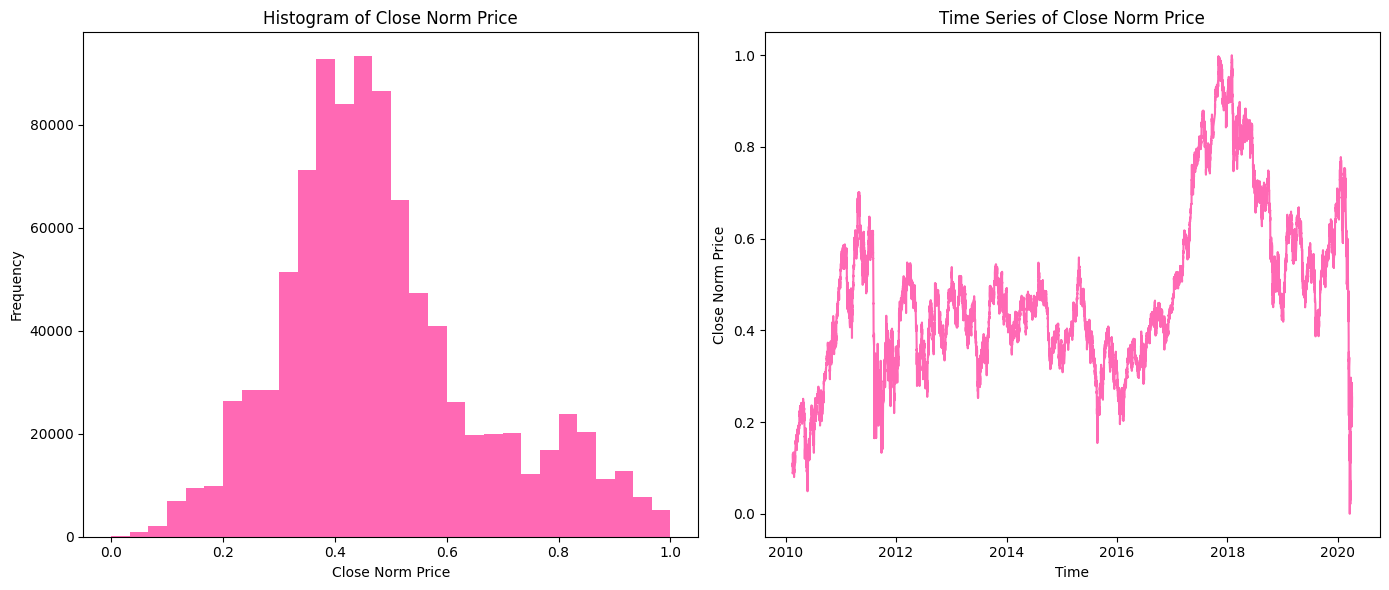

In [141]:
print(data['close_norm'].describe())

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axs[0].hist(data['close_norm'], bins=30, color='hotpink')
axs[0].set_title('Histogram of Close Norm Price')
axs[0].set_xlabel('Close Norm Price')
axs[0].set_ylabel('Frequency')

# Time series plot
axs[1].plot(data['close_norm'], color='hotpink')
axs[1].set_title('Time Series of Close Norm Price')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Close Norm Price')

plt.tight_layout()
plt.show()


## 3. ÏãúÍ∞Ä Ï†ÄÍ∞Ä Í≥†Í∞Ä Î≥ÄÌôò
- Í∞ôÏùÄ Í∞íÏùò Ï∞®Ïù¥Ïó¨ÎèÑ Ï¢ÖÍ∞Ä ÎåÄÎπÑ ÏñºÎßàÎßåÌÅºÏùò ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïòÎäîÏßÄÍ∞Ä Í∞ÄÍ≤© ÌùêÎ¶ÑÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§.
- ÏãúÍ∞Ä, Ï†ÄÍ∞Ä, Í≥†Í∞ÄÎ•º Ï¢ÖÍ∞ÄÏóê ÎåÄÌïú ÎπÑÏú®Î°ú Î≥ÄÌôò

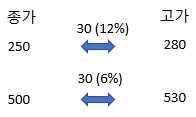

- `open_close_ratio`: ÏãúÍ∞ÄÍ∞Ä Ï¢ÖÍ∞ÄÏóê ÎπÑÌï¥ ÏñºÎßàÎÇò ÎÜíÍ±∞ÎÇò ÎÇÆÏùÄÏßÄÏùò ÏÉÅÎåÄÏ†ÅÏù∏ ÎπÑÏú®ÏùÑ ÌååÏïÖ
- `low_close_ratio` : Ï†ÄÍ∞ÄÍ∞Ä Ï¢ÖÍ∞ÄÏóê ÎπÑÌï¥ ÏñºÎßàÎÇò ÎÇÆÏùÄÏßÄ
- `high_close_ratio` : Í≥†Í∞ÄÍ∞Ä Ï¢ÖÍ∞ÄÏóê ÎπÑÌï¥ ÏñºÎßàÎÇò Ï∞®Ïù¥Í∞Ä ÎÇòÎäîÏßÄ


In [ ]:
data['open_close_ratio'] = (data.open - data.close) / data.close
data['low_close_ratio'] = (data.low - data.close) / data.close
data['high_close_ratio'] = (data.high - data.close) / data.close


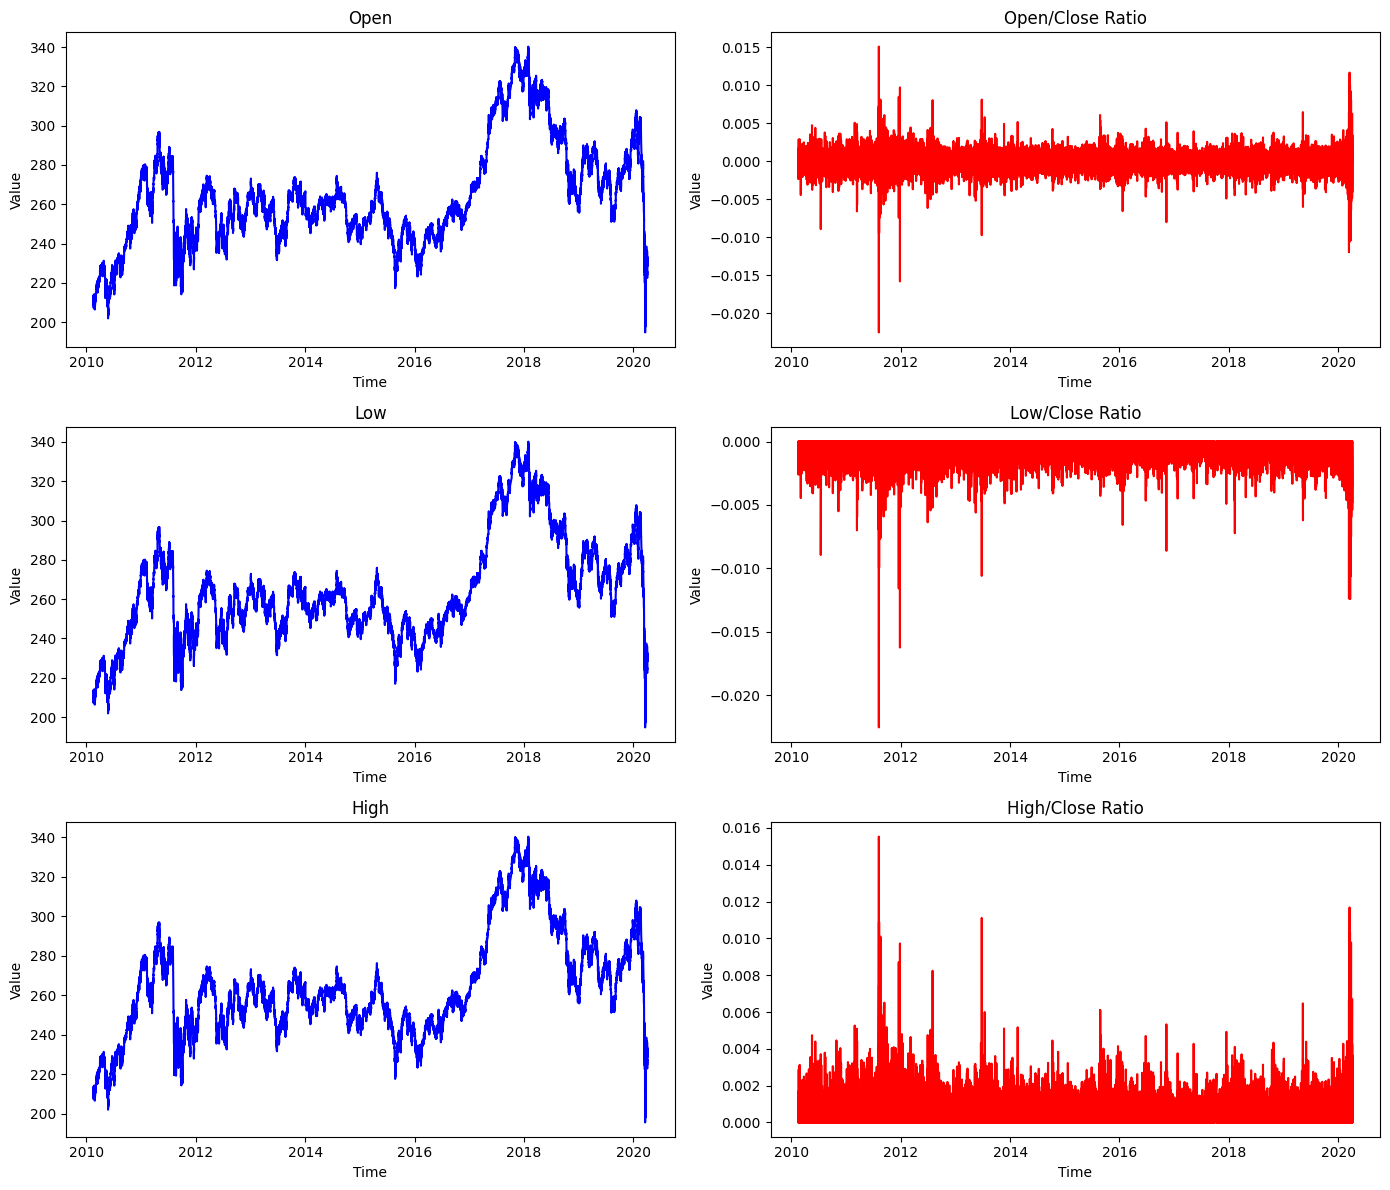

In [145]:
import matplotlib.pyplot as plt

# Create a 3x2 subplot (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# open vs open_close_ratio
axs[0, 0].plot(data['open'], label='Open', color='blue')
axs[0, 0].set_title('Open')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Value')

axs[0, 1].plot(data['open_close_ratio'], label='Open/Close Ratio', color='red')
axs[0, 1].set_title('Open/Close Ratio')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Value')

# low vs low_close_ratio
axs[1, 0].plot(data['low'], label='Low', color='blue')
axs[1, 0].set_title('Low')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Value')

axs[1, 1].plot(data['low_close_ratio'], label='Low/Close Ratio', color='red')
axs[1, 1].set_title('Low/Close Ratio')
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Value')

# high vs high_close_ratio
axs[2, 0].plot(data['high'], label='High', color='blue')
axs[2, 0].set_title('High')
axs[2, 0].set_xlabel('Time')
axs[2, 0].set_ylabel('Value')

axs[2, 1].plot(data['high_close_ratio'], label='High/Close Ratio', color='red')
axs[2, 1].set_title('High/Close Ratio')
axs[2, 1].set_xlabel('Time')
axs[2, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()


## 4. Í±∞ÎûòÎüâ
- ÎåÄÎ∂ÄÎ∂Ñ 0Ïóê Í∞ÄÍπåÏù¥ Î∂ÑÌè¨, ÏàòÏã≠ÏóêÏÑú Ïàò Î∞±Î∞∞Ïóê Îã¨ÌïòÎäî Í±∞ÎûòÎüâÎèÑ Ìï®Íªò Î∂ÑÌè¨
- min-max normalizationÏùÑ ÌïòÎ©¥ ÎåÄÎ∂ÄÎ∂Ñ 0Ïóê Í∞ÄÍπåÏö¥ Í∞íÏùÑ Í∞ÄÏßê-> Îß§Ïàò, Îß§ÎèÑ ÌñâÎèôÏùÑ Í≤∞Ï†ïÌïòÎäîÎç∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÍ∏∞ ÌûòÎì§Îã§.
- standardization : Ïã§Ï†ú Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎäî Í∞íÎì§Í≥º ÎπÑÍµêÌñàÏùÑ Îïå Í¥¥Î¶¨Í∞êÏù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ï†úÎåÄÎ°úÎêú ÌëúÏ§ÄÌôîÍ∞Ä Ïñ¥Î†§ÏõÄ, ÌòÑ ÏãúÏ†ê Í±∞ÎûòÎüâÏóê ÎåÄÌïú Í∞ÄÏπòÏôÄ Ï∞®Ïù¥Í∞Ä ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ÅÏö©ÌïòÍ∏∞Í∞Ä Í≥§ÎûÄ
- Log Transformation: ÏµúÎåÄÌïú Í±∞ÎûòÎüâÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º ÏÇ¥Î¶¨Î©¥ÏÑú ÌïôÏäµÌïòÍ∏∞Ïóê Ï¢ãÏùÄ Î∞©Ìñ•ÏúºÎ°ú Î≥ÄÌôò
- Box-Cox Transformation: Log Î≥ÄÌôò Ïãú ÏûêÏó∞ÏÉÅÏàò eÎ•º Î∞ëÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê ScaleÏùò SpectrumÏù¥ Ïó¨Ï†ÑÌûà ÌÅ¨Îã§.

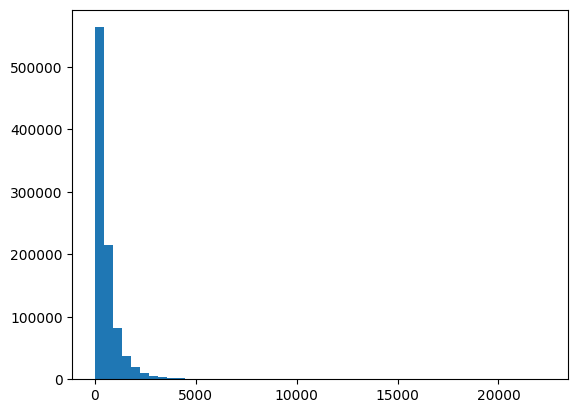

In [148]:
plt.hist(data['vol'], bins=50, label='Volume')
plt.show()

In [150]:
data['vol_log'] = np.log1p(data['vol'])  # log(1 + x) Î≥ÄÌôò
data['vol_boxcox'] = data['vol']**(1/3)  # Box-Cox Î≥ÄÌôò (lambda=1/3)


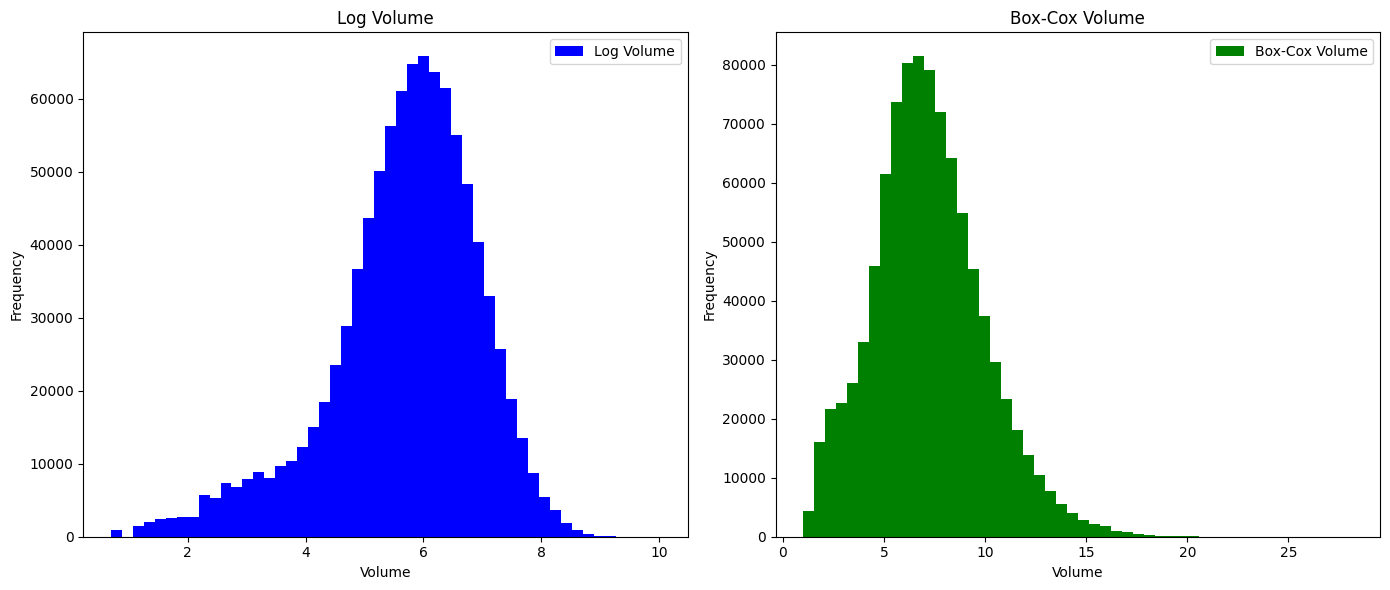

In [151]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  

ax[0].hist(data['vol_log'], bins=50, label='Log Volume', color='blue')
ax[0].set_title('Log Volume')
ax[0].set_xlabel('Volume')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(data['vol_boxcox'], bins=50, label='Box-Cox Volume', color='green')
ax[1].set_title('Box-Cox Volume')
ax[1].set_xlabel('Volume')
ax[1].set_ylabel('Frequency')
ax[1].legend()

plt.tight_layout() 
plt.show()


## 5. ÏßÄÏàò Ïù¥Îèô ÌèâÍ∑†
- EMAÎäî ÎÇ†ÏßúÍ∞Ä ÌòÑÏû¨Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îçî ÎßéÏùÄ Í∞ÄÏ§ëÏπòÎ•º Î∂ÄÏó¨ -> ÏµúÍ∑ºÏùò Í∞ÄÍ≤©ÏùÑ Ï¢Ä Îçî Ï§ëÏöîÌïòÍ≤å Î∞îÎùºÎ¥Ñ

In [162]:
windows = [5, 10, 20, 60, 120]

for window in windows:
	# NormalizationÎêú Ï¢ÖÍ∞Ä
    data['close_norm_ema{}'.format(window)] = \
        data['close_norm'].ewm(span = window, min_periods = window, adjust=False).mean()
    
    # log Î≥ÄÌôòÎêòÍ∏∞ Ï†ÑÏùò Í±∞ÎûòÎüâ
    data['vol_ema{}'.format(window)] = \
        data['vol'].ewm(span = window, min_periods = window, adjust=False).mean()
    
    # log Î≥ÄÌôò
    data['vol_transform_ema{}'.format(window)] = np.log1p(data['vol_ema{}'.format(window)])
    

5
10
20
60
120


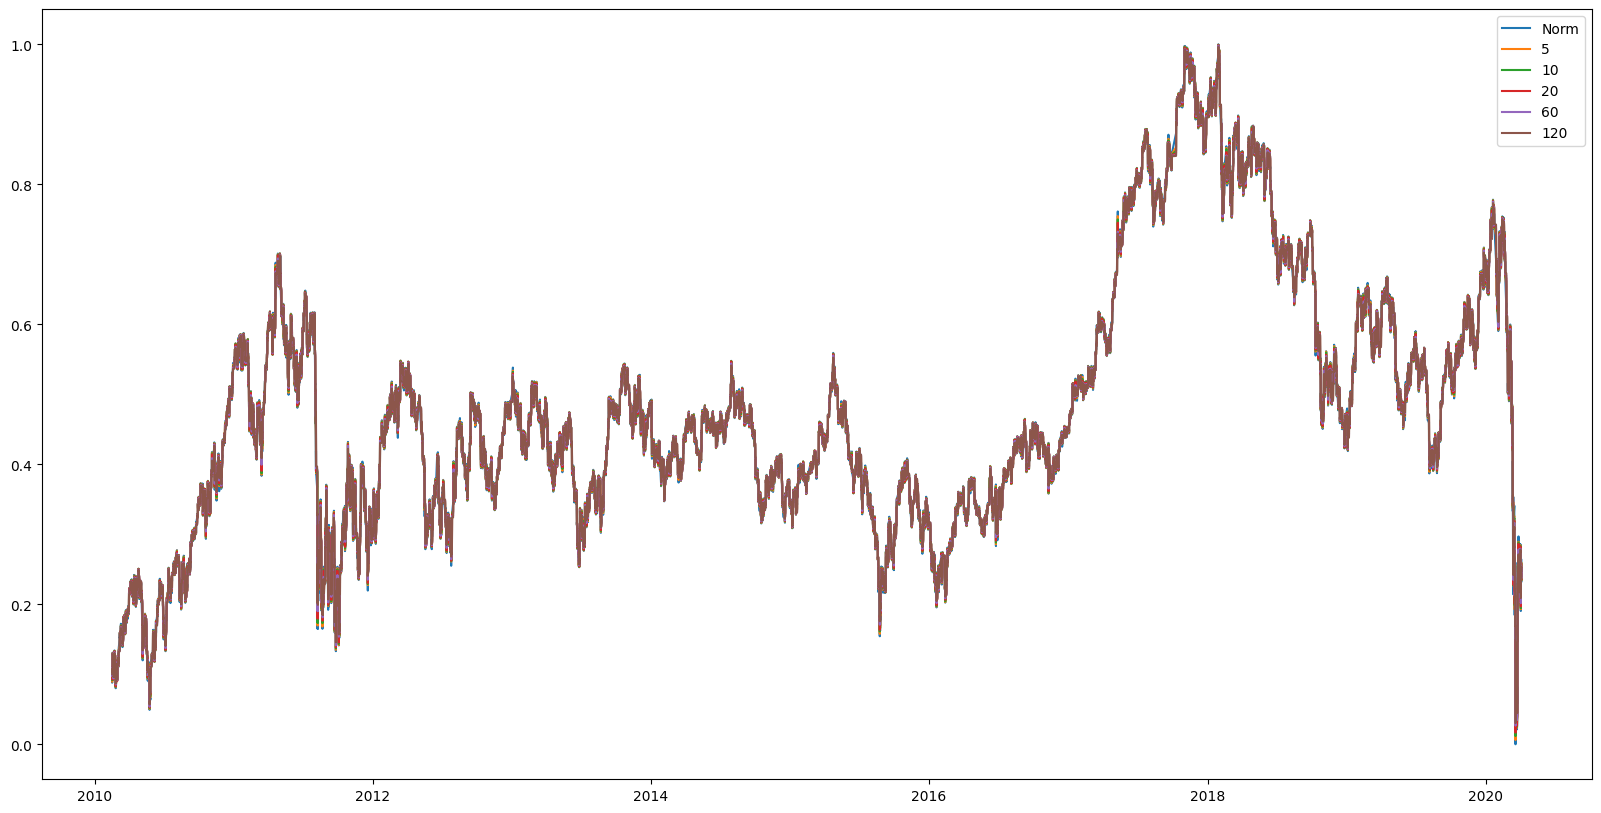

In [155]:
plt.figure(figsize=(20,10)) 
plt.plot(data['close_norm'], label = 'Norm')
for window in windows:
    print(window)
    plt.plot(data['close_norm_ema{}'.format(window)], label = window)
plt.legend()
plt.show()

5
10
20
60
120


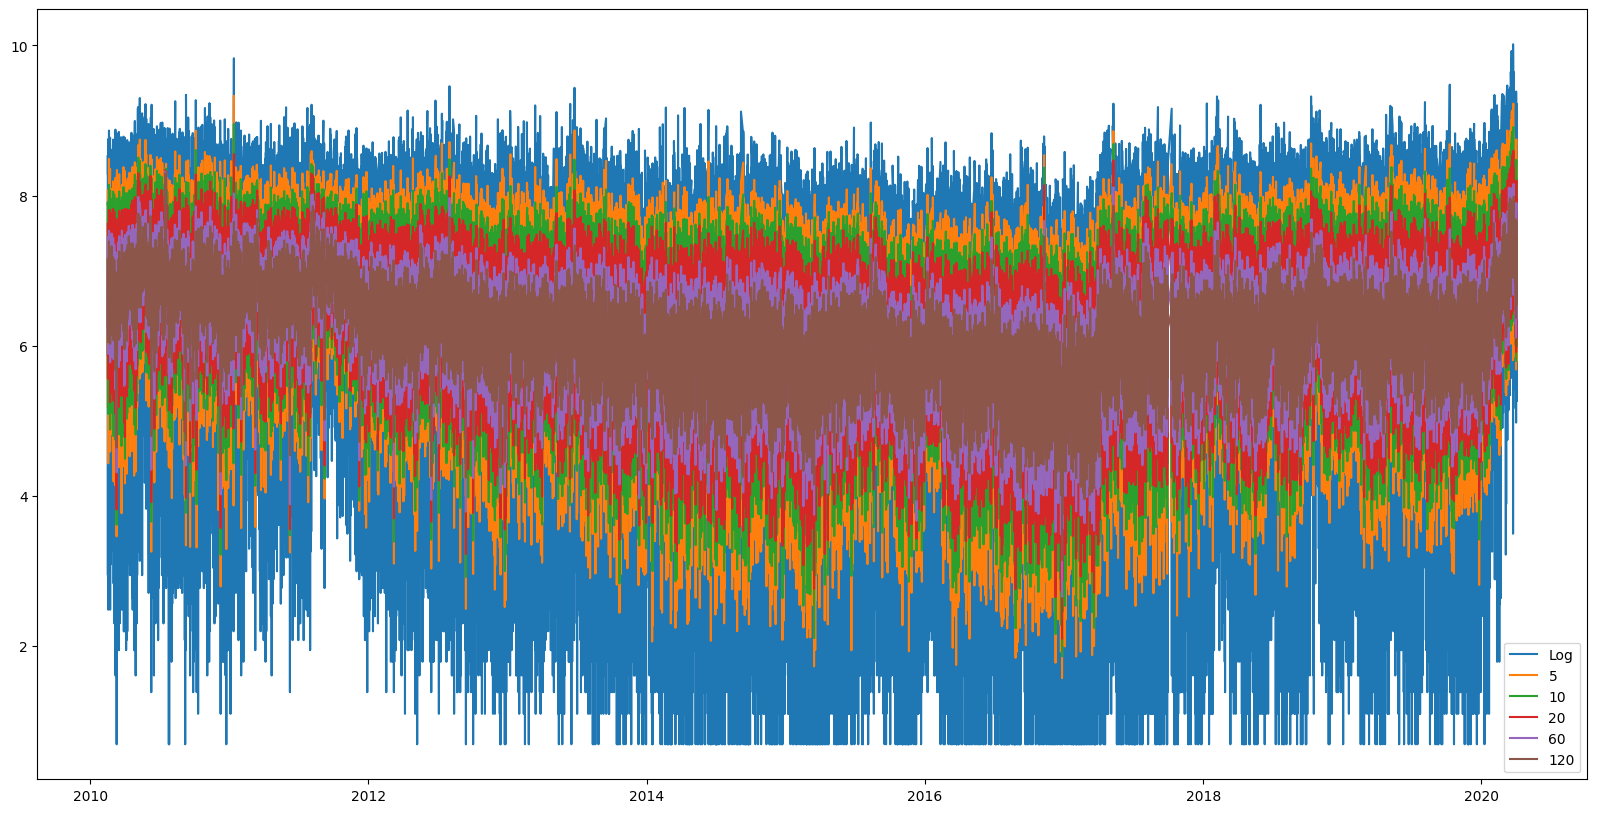

In [163]:
plt.figure(figsize=(20,10))
plt.plot(data['vol_log'], label = 'Log')
for window in windows:
    print(window)
    plt.plot(data['vol_transform_ema{}'.format(window)], label = window)
plt.legend()
plt.show()

## 6. Î≥¥Ï°∞ ÏßÄÌëú
- Ï∂îÏÑ∏ ÏßÄÌëú, Î≥ÄÎèôÏÑ± ÏßÄÌëú, Î™®Î©òÌÖÄ ÏßÄÌëú Í∑∏Î¶¨Í≥† ÏãúÏû•Í∞ïÎèÑ ÏßÄÌëúÎ°ú Íµ¨Î∂Ñ
- Ï∂îÏÑ∏ ÏßÄÌëú
    - Í∞ÄÍ≤©Ïóê ÎåÄÌïú Ï∂îÏÑ∏Î•º ÏïåÏïÑÎ≥¥Îäî ÏßÄÌëú
    - Ïù¥ÎèôÌèâÍ∑†, MACD, ROC, DMI&ADX Îì±
- Î≥ÄÎèôÏÑ± ÏßÄÌëú
    - ÏñºÎßàÎÇò Îπ†Î•¥Í≤å ÏÉÅÏäπ ÎòêÎäî ÌïòÎùΩÌï† Í≤ÉÏù∏ÏßÄ
    - Î≥ºÎ¶∞Ï†ÄÎ∞¥Îìú, Envelope Îì±
- Î™®Î©òÌÖÄ ÏßÄÌëú
    - Ìà¨Ïûê Ïã¨Î¶¨ÎÇò ÌòÑÏû¨ Ï∂îÏÑ∏Ïóê ÎåÄÌïú Ïú†Ìö®ÏÑ±ÏùÑ ÌôïÏù∏ÌïòÎäî ÏßÄÌëúÎ°ú ÏÇ¨Ïö©
    - Monetum, Stochastic, CCI, MACD Oscillator Îì±
- ÏãúÏû• Í∞ïÎèÑ ÏßÄÌëú
    - Ï∂îÏÑ∏ÎÇò Î≥ÄÎèôÏÑ±Ïóê ÎåÄÌïú ÏßÄÌëúÎ•º ÎÇòÌÉÄÎÉÑ. Í±∞ÎûòÎüâÏùÑ Ìè¨Ìï®ÏãúÏºú Í∞ÄÍ≤© ÏòàÏ∏°
    - MA, OBV, RSI


### (1) MACD
- [ MACD Í≥ÑÏÇ∞Ïãù ]
    - 1) MACD : 12Ïùº EMA - 26Ïùº EMA
    - 2) Signal : MACD 9Ïùº EMA
    - 3) Oscillator : MACD - Signal